##### Problem statement is on Broadband Outage Detection ,where we need to create a machine learning model using the metrices tracked by the company that will be able to predict the `outage_duration` so that the company can better handle outages and improve customer satisfaction and therefore reduce customer churn.

Metrices are :

1)broadband_data( There are `10 different types` of broadbands that are observed in the dataset )

2)outage_data(There are `5` different `outage_type`'s recorded in the dataset. )

3)report_data(For each event `id` there are `log_report_type` and `volume` columns are recorded. )

4)server_data(a record of the `transit_server_type` that is stored in the dataset ) 

5)train_data(which includes unique event id for each observation of the `outage_duration` in a particular `area_code` )
 

#### SETTING THE DIRECTORY

In [1]:
import os
os.chdir("C:/Users/Akanksha Dash/Downloads/20200628_CSE9099c_PHD_Dataset-1593175193570/data")

#### IMPORTING LIBRARIES


In [2]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from scipy.stats.mstats import mode
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,ComplementNB,CategoricalNB
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score,classification_report

import warnings
warnings.filterwarnings('ignore')

#### Reading the 5 CSV files

In [3]:
#Reading the CSV file 
trdata = pd.read_csv("train_data.csv", sep=',', header=0,
                        na_values='unknown')
srvdata=pd.read_csv("server_data.csv", sep=',', header=0,
                        na_values='unknown')
repdata=pd.read_csv("report_data.csv", sep=',', header=0,
                        na_values='unknown')
outdata=pd.read_csv("outage_data.csv", sep=',', header=0,
                        na_values='unknown')
brddata=pd.read_csv("broadband_data.csv", sep=',', header=0,
                        na_values='unknown')

In [4]:
print(trdata.head(3))
print(trdata.shape)

      id area_code  outage_duration
0  13366  area_415                1
1   6783  area_474                0
2   9519  area_931                1
(5904, 3)


In [5]:
print(srvdata.head(3))
print(srvdata.shape)

     id     transit_server_type
0  6597  transit_server_type_11
1  8011  transit_server_type_15
2  2597  transit_server_type_15
(31170, 2)


In [6]:
print(repdata.head(3))
print(repdata.shape)

     id     log_report_type  volume
0  6597  log_report_type_68       6
1  8011  log_report_type_68       7
2  2597  log_report_type_68       1
(58671, 3)


In [7]:
print(outdata.head(3))
print(outdata.shape)

     id    outage_type
0  6597  outage_type_2
1  8011  outage_type_2
2  2597  outage_type_2
(18552, 2)


In [8]:
print(brddata.head(3))
print(brddata.shape)

     id    broadband_type
0  6597  broadband_type_8
1  8011  broadband_type_8
2  2597  broadband_type_8
(21076, 2)


#### MERGING THE DATAS

In [9]:
#MERGING THE DATA TO WORK ON
train_1 = trdata.merge(brddata, how = 'left', left_on='id', right_on='id')
train_2 = train_1.merge(outdata, how = 'left', left_on='id', right_on='id')
train_3 = train_2.merge(repdata, how = 'left', left_on='id', right_on='id')
traindata = train_3.merge(srvdata, how = 'left', left_on='id', right_on='id')


In [10]:
#1st merge shape
train_1.shape

(6754, 4)

In [11]:
#2nd merge shape
train_2.shape

(6754, 5)

In [12]:
#3rd merge shape
train_3.shape

(22679, 7)

In [13]:
print("Shape of merged Data set :\n\n",traindata.shape,"\n")

Shape of merged Data set :

 (48973, 8) 



#### REMOVING THE DUPLICATES 

In [14]:
traindata.drop_duplicates(subset= 'id', keep= 'first', inplace = True)

In [15]:
print("Shape of Data set after removing duplicates:\n\n",traindata.shape,"\n")

Shape of Data set after removing duplicates:

 (5904, 8) 



In [16]:
#Creating a copy 
train_data=traindata.copy()

#### EDA

In [17]:
print("Dimension of our final Dataset :\n\n",train_data.shape,"\n")

Dimension of our final Dataset :

 (5904, 8) 



As shape tells us the dimension, we have 5904 rows and 8 columns . Also checking the dimension after creating a copy

In [18]:
# Let's check the names of the columns?
print(list(train_data.columns))

['id', 'area_code', 'outage_duration', 'broadband_type', 'outage_type', 'log_report_type', 'volume', 'transit_server_type']


In [19]:
train_data.columns

Index(['id', 'area_code', 'outage_duration', 'broadband_type', 'outage_type',
       'log_report_type', 'volume', 'transit_server_type'],
      dtype='object')

In [20]:
#Displays the types of data we have in train dataset
train_data.dtypes

id                      int64
area_code              object
outage_duration         int64
broadband_type         object
outage_type            object
log_report_type        object
volume                  int64
transit_server_type    object
dtype: object

In [21]:
#Displays each of the column along with its type and the memory used by the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5904 entries, 0 to 48971
Data columns (total 8 columns):
id                     5904 non-null int64
area_code              5904 non-null object
outage_duration        5904 non-null int64
broadband_type         5904 non-null object
outage_type            5904 non-null object
log_report_type        5904 non-null object
volume                 5904 non-null int64
transit_server_type    5904 non-null object
dtypes: int64(3), object(5)
memory usage: 415.1+ KB


In [22]:
#Displays stastical information about each of the columns eg. count, frequency of occurance of a value etc
train_data.describe()  #Numerical

,id,outage_duration,volume
count,5904.000000,5904.000000,5904.000000
mean,9323.841972,0.450203,8.528455
std,5338.654942,0.666642,22.752851
min,1.000000,0.000000,1.000000
25%,4763.500000,0.000000,1.000000
50%,9330.500000,0.000000,2.000000
75%,13932.750000,1.000000,7.000000
max,18550.000000,2.000000,636.000000


In [23]:
train_data.describe(include = "all") #to include both numerical and categorical

,id,area_code,outage_duration,broadband_type,outage_type,log_report_type,volume,transit_server_type
count,5904.000000,5904,5904.000000,5904,5904,5904,5904.000000,5904
unique,NaN,876,NaN,9,5,213,NaN,44
top,NaN,area_821,NaN,broadband_type_8,outage_type_2,log_report_type_312,NaN,transit_server_type_11
freq,NaN,67,NaN,2882,2875,580,NaN,1820
mean,9323.841972,NaN,0.450203,NaN,NaN,NaN,8.528455,NaN
std,5338.654942,NaN,0.666642,NaN,NaN,NaN,22.752851,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,4763.500000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
50%,9330.500000,NaN,0.000000,NaN,NaN,NaN,2.000000,NaN
75%,13932.750000,NaN,1.000000,NaN,NaN,NaN,7.000000,NaN


In [24]:
#Checking Null values
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
transit_server_type,0,0.0
volume,0,0.0
log_report_type,0,0.0
outage_type,0,0.0
broadband_type,0,0.0
outage_duration,0,0.0
area_code,0,0.0
id,0,0.0


#### Distribution of Target variable

In [25]:
train_data.outage_duration.value_counts()

0    3827
1    1496
2     581
Name: outage_duration, dtype: int64

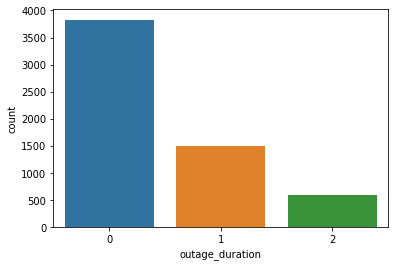

0    3827
1    1496
2     581
Name: outage_duration, dtype: int64


In [26]:
# Plot Distribution
sns.countplot(x='outage_duration',data=train_data)
plt.show()

# What are the counts?
print(train_data.outage_duration.value_counts())



DRAWING TRENDS TOWARDS TARGET VARIABLE 

In [27]:
train_data.outage_duration.value_counts(normalize = True)*100

0    64.820461
1    25.338753
2     9.840786
Name: outage_duration, dtype: float64

In [28]:
train_data.outage_duration.value_counts(normalize = True,dropna = False)

0    0.648205
1    0.253388
2    0.098408
Name: outage_duration, dtype: float64

 Understanding the distribution of other variables

In [29]:
train_data.area_code.value_counts() 

area_821     67
area_1107    61
area_126     59
area_734     57
area_1008    57
             ..
area_213      1
area_483      1
area_968      1
area_941      1
area_436      1
Name: area_code, Length: 876, dtype: int64

In [30]:
train_data.transit_server_type.value_counts() 

transit_server_type_11    1820
transit_server_type_35    1106
transit_server_type_15     993
transit_server_type_34     984
transit_server_type_20     275
transit_server_type_13     107
transit_server_type_54     106
transit_server_type_23      75
transit_server_type_42      58
transit_server_type_44      56
transit_server_type_14      42
transit_server_type_22      32
transit_server_type_21      31
transit_server_type_43      27
transit_server_type_10      26
transit_server_type_50      21
transit_server_type_18      15
transit_server_type_30      14
transit_server_type_24      13
transit_server_type_32      12
transit_server_type_47      11
transit_server_type_26       9
transit_server_type_40       7
transit_server_type_29       6
transit_server_type_46       6
transit_server_type_27       5
transit_server_type_2        5
transit_server_type_38       5
transit_server_type_5        5
transit_server_type_7        5
transit_server_type_6        4
transit_server_type_8        3
transit_

In [31]:
print(train_data.outage_type.value_counts())

outage_type_2    2875
outage_type_1    2700
outage_type_4     306
outage_type_5      19
outage_type_3       4
Name: outage_type, dtype: int64


In [32]:
train_data.log_report_type.value_counts() 

log_report_type_312    580
log_report_type_82     495
log_report_type_232    463
log_report_type_203    308
log_report_type_54     235
                      ... 
log_report_type_224      1
log_report_type_292      1
log_report_type_65       1
log_report_type_353      1
log_report_type_49       1
Name: log_report_type, Length: 213, dtype: int64

In [33]:
print(train_data.groupby('volume').mean())

                  id  outage_duration
volume                               
1        9384.400913         0.410502
2        9439.679449         0.424779
3        9066.563510         0.360277
4        9828.411594         0.510145
5        8885.803922         0.426471
...              ...              ...
283      9115.000000         0.000000
312       812.000000         0.000000
334      5558.000000         0.000000
451     17078.000000         0.000000
636      1456.000000         0.000000

[139 rows x 2 columns]


### DATA VISUALISATION

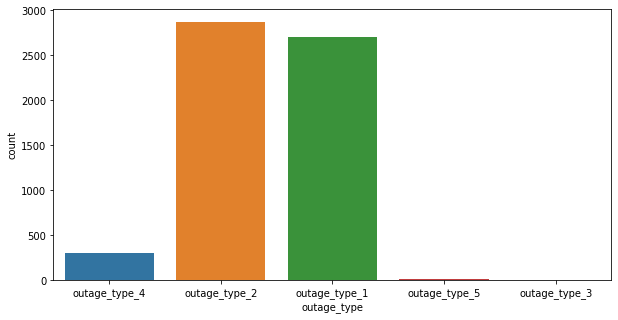

In [34]:
## COUNT PLOT FOR OUTAGE TYPE

plt.figure(figsize = (10,5))
sns.countplot(train_data['outage_type'])
plt.show()

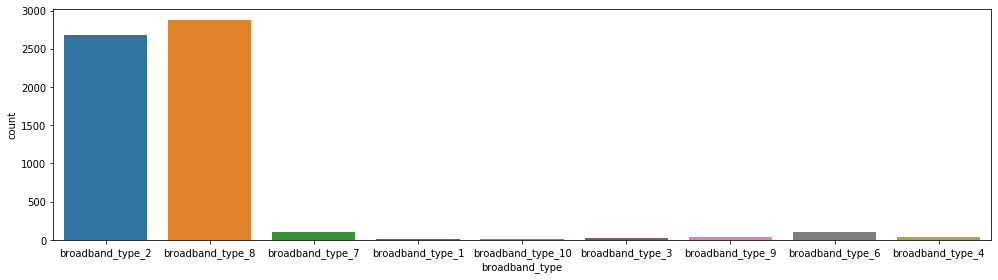

In [35]:
#count plot for Broadband type

plt.figure(figsize = (14,4))
sns.countplot(train_data['broadband_type'])
plt.tight_layout()
plt.show()

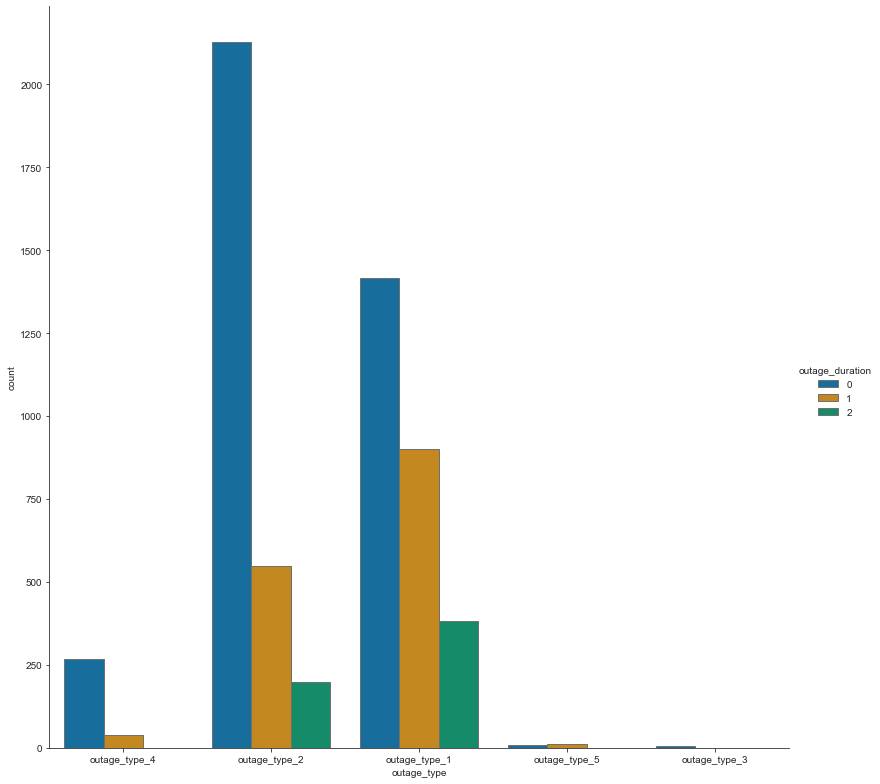

In [36]:
#cat plot for outage type w.r.t outage_duration
sns.set_style("ticks")
sns.catplot(x="outage_type", hue="outage_duration", kind="count",height=11,
            palette="colorblind", edgecolor=".44",
            data=train_data);

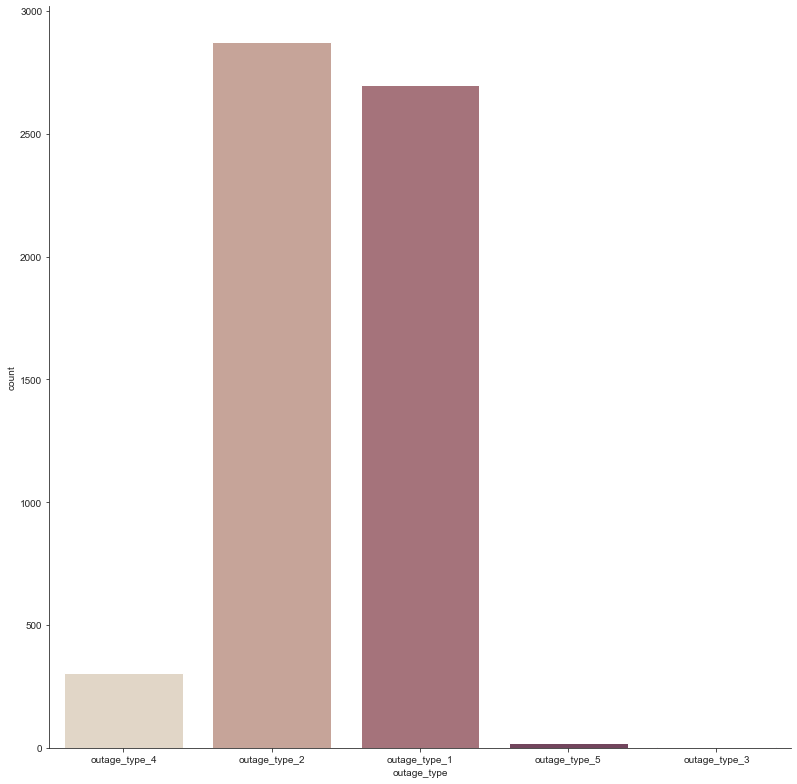

In [37]:
#catplot for outage_type
sns.catplot(x="outage_type", kind="count", palette="ch:.25",height=11, data=train_data);

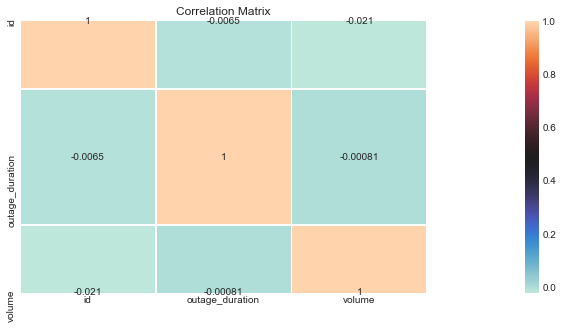

In [38]:
#plotting the correlation matrix
plt.style.use('seaborn-dark')
plt.figure(figsize =(35,5))
sns.heatmap(train_data.corr(),vmax = 1,linewidths= 1,square= True, 
           annot= True, cmap='icefire', linecolor= 'white')

plt.title('Correlation Matrix', fontsize =12)
plt.show()

This plot only shows the correlation between the numeric columns. To see the complete correlation matrix we would have to convert the categorical columns to ints using label encoding etc and then visualize the correlation matrix again. 

##### Answering questions from the operations team: 

The operations team at ‘India Broadband’ has asked you the following questions 
 
1) Which areas are most prone to long outage durations? 

2) Which broadband types are suspect of long outage durations? 

3) Any other recommendations to improve the detection of outage durations. 

 ANSWER TO THE FIRST QUESTION i.e Which areas are most prone to long outage durations? 

In [39]:
#approach 1
long_outage = train_data.loc[train_data.outage_duration==2,'area_code'].value_counts()

In [40]:
long_outage

area_1100    28
area_1107    27
area_600     27
area_821     24
area_734     23
             ..
area_738      1
area_1103     1
area_559      1
area_32       1
area_551      1
Name: area_code, Length: 135, dtype: int64

In [41]:
prone= train_data['outage_duration']==2

In [42]:
prone= train_data[prone]

In [43]:
prone.head()

,id,area_code,outage_duration,broadband_type,outage_type,log_report_type,volume,transit_server_type
17,4555,area_600,2,broadband_type_8,outage_type_2,log_report_type_82,30,transit_server_type_15
79,1373,area_962,2,broadband_type_8,outage_type_1,log_report_type_203,16,transit_server_type_15
117,4209,area_1086,2,broadband_type_8,outage_type_2,log_report_type_82,23,transit_server_type_15
157,8984,area_976,2,broadband_type_8,outage_type_2,log_report_type_82,40,transit_server_type_15
163,14361,area_704,2,broadband_type_8,outage_type_1,log_report_type_80,5,transit_server_type_15


area_1100    28
area_1107    27
area_600     27
area_821     24
area_734     23
area_704     19
area_1019    18
area_810     18
Name: area_code, dtype: int64

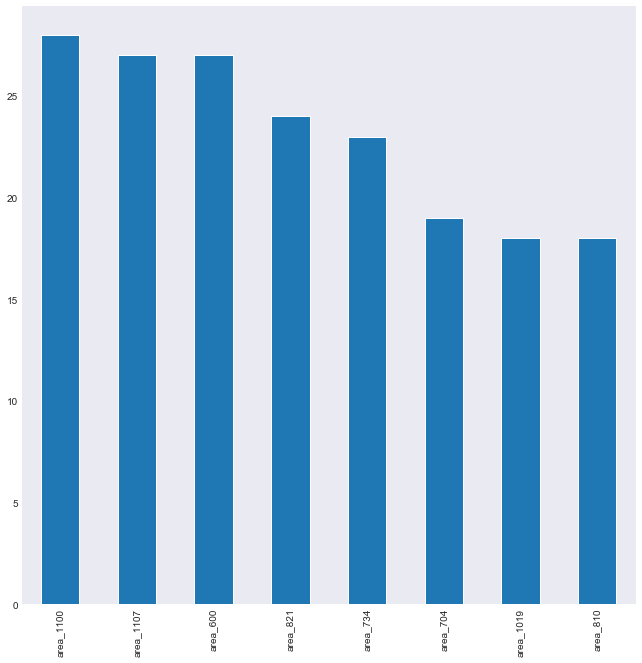

In [44]:
count=prone.area_code.value_counts()
count.head(8).plot(kind='bar',figsize=(11,11))
count.head(8)

In [45]:
#approach 2
Agg=train_data[['id','area_code','outage_duration']].groupby(['area_code','outage_duration']).agg('count').reset_index().rename(columns={'id':'count'})

Agg=Agg.sort_values(by=['count'],ascending=False)

ans=Agg[Agg['outage_duration']==2]

ans1=ans.reset_index()
ans1
del ans1['index']
ans1["cumpercentage"] = ans1["count"].cumsum()/ans1["count"].sum()*100
ans1

,area_code,outage_duration,count,cumpercentage
0,area_1100,2,28,4.819277
1,area_600,2,27,9.466437
2,area_1107,2,27,14.113597
3,area_821,2,24,18.244406
4,area_734,2,23,22.203098
...,...,...,...,...
130,area_1026,2,1,99.311532
131,area_724,2,1,99.483649
132,area_33,2,1,99.655766
133,area_73,2,1,99.827883


 ANSWER TO THE SECOND QUESTION i.e 'Which broadband types are suspect of long outage durations? '

outage_duration       0    1    2
broadband_type                   
broadband_type_1      4    5    5
broadband_type_10     8    4    1
broadband_type_2   2166  454   62
broadband_type_3     11   14    1
broadband_type_4     23   20    1
broadband_type_6     34   60    8
broadband_type_7     54   41    4
broadband_type_8   1505  879  498
broadband_type_9     22   19    1


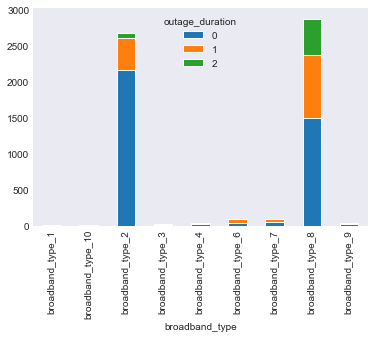

In [46]:
#1st APPROACH
suspects=pd.crosstab(train_data['broadband_type'],train_data['outage_duration']) 
print(suspects)
suspects.plot.bar(stacked =True)
plt.show()

INSIGHTS:
As 2 is for 'long outage' from above observation broadband type 8 has begged the position for suspect by 498 counts 

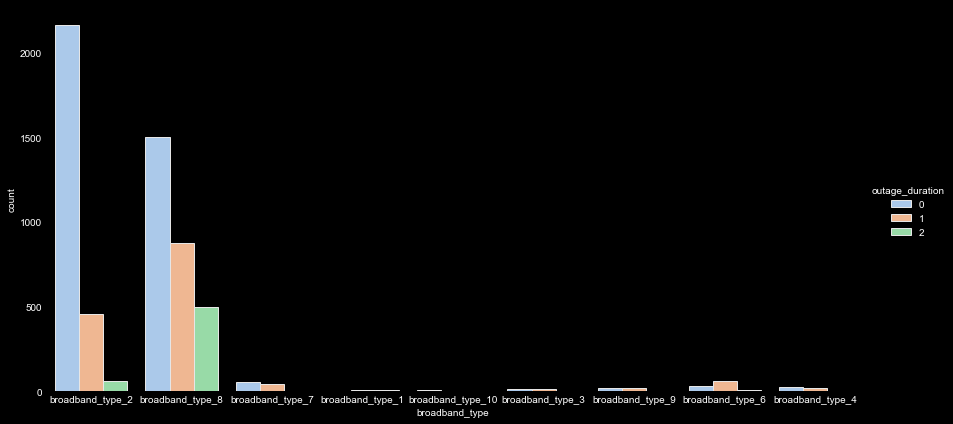

In [47]:
#2nd approach
plt.style.use('dark_background') 
sns.catplot(x="broadband_type", hue="outage_duration", kind="count",height=6,aspect=2,
            palette="pastel", edgecolor=".9",
            data=train_data);

In [48]:
#3rd Approach
ans2=train_data.groupby(['broadband_type']).sum()

In [49]:
ans2

,id,outage_duration,volume
broadband_type,,,
broadband_type_1,150380,15,97
broadband_type_10,86070,6,23
broadband_type_2,25027078,578,24954
broadband_type_3,301850,16,69
broadband_type_4,371267,22,167
broadband_type_6,934159,76,201
broadband_type_7,956429,49,269
broadband_type_8,26825297,1875,24500
broadband_type_9,395433,21,72


In [50]:
ans_2=ans2.drop(['id','volume'], axis=1).sort_values('outage_duration', ascending=False)

In [51]:
ans_2

,outage_duration
broadband_type,
broadband_type_8,1875
broadband_type_2,578
broadband_type_6,76
broadband_type_7,49
broadband_type_4,22
broadband_type_9,21
broadband_type_3,16
broadband_type_1,15
broadband_type_10,6


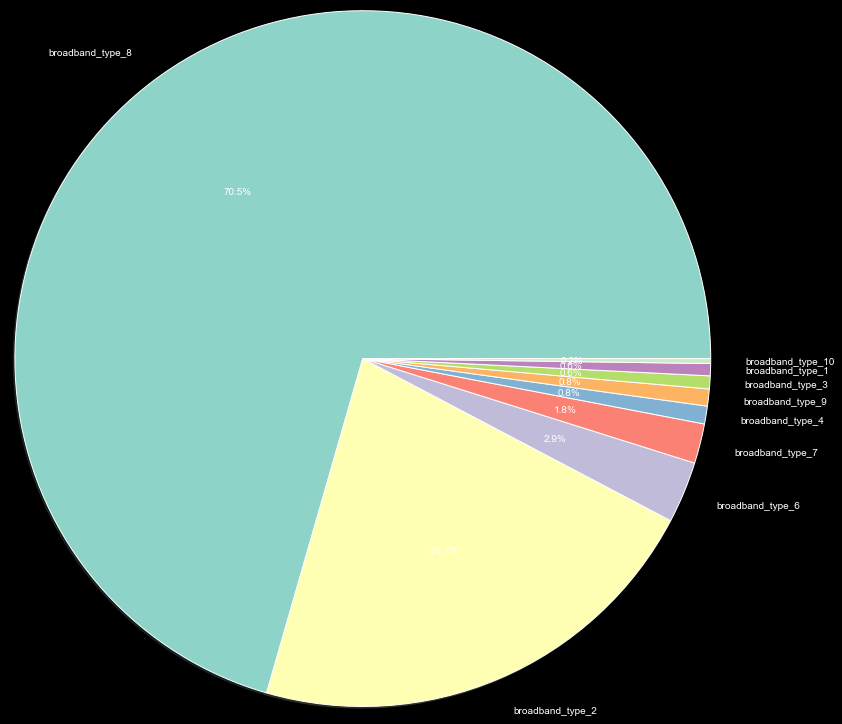

In [52]:
#4th approach
plt.style.use('dark_background') 
label_list1 = ans_2.index
plt.pie(ans_2['outage_duration'],labels=label_list1,autopct ='%1.1f%%',radius=4, shadow = True) 
plt.show()

In [53]:
#3RD ANSWER - AT THIS MOMENT IT WOULD BE WRONG TO GIVE ANY RECOMMENDATIONS TO IMPROVE THE DETECTION OF OUTAGE DURATION
#AFTER MODELING AND UNDERSTANDING THE FEATURE IMPORTANCE I CAN BE IN A SITUATION TO RECOMMEND

#### Reading all csv files and test data given on later stage

In [54]:
train_datas=pd.read_csv('train_data.csv')
broadband_data=pd.read_csv('broadband_data.csv')
outage_data=pd.read_csv('outage_data.csv')
report_data=pd.read_csv('report_data.csv')
server_data=pd.read_csv('server_data.csv')
test_data=pd.read_csv("test_data-1593798292529.csv",header=0,sep=",")

#### FEATURE ENGINERING 

Below I am doing 2 things:

  a) In future as i am going to dummify i have concatinated both test data and train data
  
  b) I am creating a new column called source (train/test) as i have concatinated the data

In [55]:
train_datas['source']='train'
test_data['source']='test'
data = pd.concat(objs=[train_datas, test_data], axis=0, ignore_index=True)
print(data.head(5))
print(data.shape)
print("\n")
print(train_datas.shape)
print("\n")
print(test_data.shape)
print("\n")
#print(len(data['area_code'].unique()))
print(data['outage_duration'].value_counts())

  area_code     id  outage_duration source
0  area_415  13366              1.0  train
1  area_474   6783              0.0  train
2  area_931   9519              1.0  train
3  area_700  10202              1.0  train
4  area_600   4555              2.0  train
(7381, 4)


(5904, 4)


(1477, 3)


0.0    3827
1.0    1496
2.0     581
Name: outage_duration, dtype: int64


#### FE ON SERVER DATA

In [56]:
# Feature engineering by calculating the contribution of each column towards the target varibale i.e outage duration

In [57]:
# FE by two main calculations here
# 1. Percen = Percentage contribution of feature in the train data
# 2. Mod_srv= Highest outage occured for given feature using MODE
# And going forward we can find this calculations for other variables too.

In [58]:
server_data = server_data.merge(data, on='id')
server_data1 = pd.DataFrame(server_data['transit_server_type'].value_counts())
display(server_data.head())
display(server_data1.head())

,id,transit_server_type,area_code,outage_duration,source
0,8011,transit_server_type_15,area_1,0.0,train
1,2588,transit_server_type_15,area_1,0.0,train
2,2588,transit_server_type_11,area_1,0.0,train
3,4848,transit_server_type_11,area_1,0.0,train
4,4848,transit_server_type_15,area_1,0.0,train


,transit_server_type
transit_server_type_11,3068
transit_server_type_35,2693
transit_server_type_34,2411
transit_server_type_15,1724
transit_server_type_20,557


In [59]:
# Here we are checking the contribution of the individual Transit Server Type to Train Data with respect to complete data 
# which will help us in understanding most used transit server type
server_data1['Percen'] = server_data.pivot_table(values='source',index='transit_server_type',aggfunc=lambda x: sum(x=='train')/float(len(x)))
display(server_data1.tail(11))

,transit_server_type,Percen
transit_server_type_53,5,0.80
transit_server_type_31,5,0.60
transit_server_type_37,4,1.00
transit_server_type_19,4,0.75
transit_server_type_51,3,1.00
transit_server_type_9,3,1.00
transit_server_type_12,2,1.00
transit_server_type_25,1,1.00
transit_server_type_48,1,1.00
transit_server_type_1,1,1.00


In [60]:
# Apllying the 2nd calculation we discussed above i.e 
# Checking Maximum occured value for outage duration for each transit server type in given server data
# Mode[0]= 1st highest mode value 
server_data1['Mode_srv'] = server_data.loc[server_data['source']=='train'].pivot_table(values='outage_duration',index='transit_server_type', aggfunc=lambda x: mode(x).mode[0])
print(server_data1.head(11))
#Maximum occured value(0,1,2) for outage duration for each transit server type in given server data

                        transit_server_type    Percen  Mode_srv
transit_server_type_11                 3068  0.806063       0.0
transit_server_type_35                 2693  0.801337       0.0
transit_server_type_34                 2411  0.798424       0.0
transit_server_type_15                 1724  0.794664       0.0
transit_server_type_20                  557  0.784560       0.0
transit_server_type_54                  264  0.768939       1.0
transit_server_type_13                  247  0.813765       1.0
transit_server_type_23                  198  0.803030       0.0
transit_server_type_42                  185  0.800000       0.0
transit_server_type_44                  178  0.797753       0.0
transit_server_type_14                  144  0.791667       0.0


In [61]:
#checking bottom 15 servers used least by train data 
server_data1.iloc[-15:]
server_data1['pre_process'] = server_data1.index.values
# Creating a new column called pre_process

# We are Marking rows as dicard which has transit server types that made no contribution to Train data given for preprocess
server_data1['pre_process'].loc[server_data1['Percen']==0] = 'discard'
# Marking rows as dicard if it has no outage duration
# Mark as Server Type others_0 f it has Outage duration from Class 0
# Mark as Server Type others_1 f it has Outage duration from Class 1
# Mark as Server Type others_2 f it has Outage duration from Class 2

# We are updating this understand to the preprocessing of features , remove unnecessary# Classify min used as others and maximum used , allowing the features to calculate their importancetop_unchange = 15

server_data1['pre_process'].iloc[top_unchange:] = server_data1['Mode_srv'].iloc[top_unchange:].apply(lambda x: 'discard' if pd.isnull(x) else 'server_type others_%d'%int(x))

print(server_data1['pre_process'].value_counts())
print(server_data1)

server_type others_0      23
server_type others_1       6
server_type others_2       5
transit_server_type_21     1
transit_server_type_54     1
transit_server_type_44     1
transit_server_type_13     1
transit_server_type_23     1
transit_server_type_34     1
transit_server_type_43     1
transit_server_type_35     1
transit_server_type_11     1
transit_server_type_42     1
transit_server_type_10     1
transit_server_type_20     1
transit_server_type_22     1
transit_server_type_15     1
transit_server_type_14     1
Name: pre_process, dtype: int64
                        transit_server_type    Percen  Mode_srv  \
transit_server_type_11                 3068  0.806063       0.0   
transit_server_type_35                 2693  0.801337       0.0   
transit_server_type_34                 2411  0.798424       0.0   
transit_server_type_15                 1724  0.794664       0.0   
transit_server_type_20                  557  0.784560       0.0   
transit_server_type_54                  264 

In [62]:
#Based on their transit server type we are adding server data1 to the preprocess features.
server_data = server_data.merge(server_data1[['pre_process']], left_on='transit_server_type',right_index=True)
display(server_data.head())

#Levels reduced from 53 to 18(15+3) for Transit Server type
server_data['pre_process'].value_counts()
#Now it's 7381 rows and 18 columns

#Dummifying  Preproces Transit Server Type
server_merge = server_data.pivot_table(values='transit_server_type',index='id',columns='pre_process',aggfunc=lambda x: len(x), fill_value=0)
display(server_merge.shape)

#Merging dummified Transit Server Type data into base data set
data = data.merge(server_merge, left_on='id', right_index=True)
data.head(3)

,id,transit_server_type,area_code,outage_duration,source,pre_process
0,8011,transit_server_type_15,area_1,0.0,train,transit_server_type_15
1,2588,transit_server_type_15,area_1,0.0,train,transit_server_type_15
4,4848,transit_server_type_15,area_1,0.0,train,transit_server_type_15
6,6914,transit_server_type_15,area_1,0.0,train,transit_server_type_15
7,5337,transit_server_type_15,area_1,0.0,train,transit_server_type_15


(7381, 18)

,area_code,id,outage_duration,source,server_type others_0,server_type others_1,server_type others_2,transit_server_type_10,transit_server_type_11,transit_server_type_13,...,transit_server_type_20,transit_server_type_21,transit_server_type_22,transit_server_type_23,transit_server_type_34,transit_server_type_35,transit_server_type_42,transit_server_type_43,transit_server_type_44,transit_server_type_54
0,area_415,13366,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,area_474,6783,0.0,train,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,area_931,9519,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### FE ON LOG REPORT DATA

In [63]:
#Below we are applying same calculations discussed above i.e percen and Mode severity
report_data = report_data.merge(data[['id','outage_duration','source']], on='id')
report_data1 = pd.DataFrame(report_data['log_report_type'].value_counts())
report_data1['Percen'] = report_data.pivot_table(values='source',index='log_report_type',aggfunc=lambda x: sum(x=='train')/float(len(x)))
report_data1['Mode_srv'] = report_data.loc[report_data['source']=='train'].pivot_table(values='outage_duration',index='log_report_type', aggfunc=lambda x: mode(x).mode[0])
display(len(report_data1))

331

In [64]:
#Bottom 15 server
report_data1.iloc[-15:]
report_data1['pre_process'] = report_data1.index.values
report_data1['pre_process'].loc[report_data1['Percen']==1] = np.nan
top_unchange = 125
report_data1['pre_process'].iloc[top_unchange:] = report_data1['Mode_srv'].iloc[top_unchange:].apply(lambda x: 'discard' if pd.isnull(x) else 'log_report_type others_%d'%int(x))


In [65]:
report_data = report_data.merge(report_data1[['pre_process']], left_on='log_report_type',right_index=True)
report_data['pre_process'].value_counts() 
report_merge = report_data.pivot_table(values='volume',index='id',columns='pre_process',aggfunc=np.sum, fill_value=0)
display(report_merge.shape)
data = data.merge(report_merge, left_on='id', right_index=True)
display(data.head(3))

(7374, 127)

,area_code,id,outage_duration,source,server_type others_0,server_type others_1,server_type others_2,transit_server_type_10,transit_server_type_11,transit_server_type_13,...,log_report_type_8,log_report_type_80,log_report_type_81,log_report_type_82,log_report_type_83,log_report_type_85,log_report_type_86,log_report_type_87,log_report_type_94,log_report_type_95
0,area_415,13366,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,area_474,6783,0.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,area_931,9519,1.0,train,0,0,0,0,0,0,...,0,2,0,6,0,0,0,0,0,0


#### FE ON BROADBAND TYPE DATA

In [66]:
#Below we are applying same calculations discussed above i.e percen and Mode severity
broadband_data['broadband_type'].value_counts()
broadband_data = broadband_data.merge(data[['id','outage_duration','source']], on='id')
broadband_data.head() #bydefault it takes first five rows
broadband_data1 = pd.DataFrame(broadband_data['broadband_type'].value_counts())
broadband_data1.head()

#finding the percentage of broadband contibution
broadband_data1['Percen'] = broadband_data.pivot_table(values='source',index='broadband_type',aggfunc=lambda x: sum(x=='train')/float(len(x)))
print(broadband_data1.tail(14))

# finding the highest outage occured for given broadband data using MODE
broadband_data1['Mode_srv'] = broadband_data.loc[broadband_data['source']=='train'].pivot_table(values='outage_duration',index='broadband_type', aggfunc=lambda x: mode(x).mode[0])
print(broadband_data1.head(4))

#Dummyfying
broadband_data_merge = broadband_data.pivot_table(values='source',index='id',columns='broadband_type',aggfunc=lambda x: len(x), fill_value=0)

#Merging the broad_band_merge with data
data = data.merge(broadband_data_merge, left_on='id', right_index=True)
display(data.head(10))

                   broadband_type    Percen
broadband_type_8             4044  0.800940
broadband_type_2             3585  0.795258
broadband_type_6              247  0.813765
broadband_type_7              225  0.795556
broadband_type_4              144  0.791667
broadband_type_9               77  0.792208
broadband_type_3               58  0.758621
broadband_type_10              35  0.800000
broadband_type_1               34  0.794118
broadband_type_5                4  0.750000
                  broadband_type    Percen  Mode_srv
broadband_type_8            4044  0.800940       0.0
broadband_type_2            3585  0.795258       0.0
broadband_type_6             247  0.813765       1.0
broadband_type_7             225  0.795556       0.0


,area_code,id,outage_duration,source,server_type others_0,server_type others_1,server_type others_2,transit_server_type_10,transit_server_type_11,transit_server_type_13,...,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_5,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9
0,area_415,13366,1.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,area_474,6783,0.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,area_931,9519,1.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,area_700,10202,1.0,train,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,area_600,4555,2.0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,area_645,5281,0.0,train,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,area_576,1872,0.0,train,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,area_734,8729,1.0,train,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,area_326,9312,0.0,train,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,area_923,14880,0.0,train,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


#### FEATURE ENGINEERING ON OUTAGE TYPE

In [70]:
outage_data['outage_type'].value_counts()
outage_data = outage_data.merge(data[['id','outage_duration','source']], on='id')
outage_data1 = pd.DataFrame(outage_data['outage_type'].value_counts())
#Determining the % of outage type contribution:
outage_data1['Percen'] = outage_data.pivot_table(values='source',index='outage_type',aggfunc=lambda x: sum(x=='train')/float(len(x)))
outage_data1.head(7)
#Determine the mode of each:
outage_data1['Mode_svr'] = outage_data.loc[outage_data['source']=='train'].pivot_table(values='outage_duration',index='outage_type', aggfunc=lambda x: mode(x).mode[0])
outage_data.loc[server_data['source']=='train'].pivot_table(values='outage_duration',index='outage_type', aggfunc=lambda x: mode(x))
outage_data.loc[outage_data['outage_type']=='outage_type_3','outage_type'] = 'outage_type 5'
#DUMMYFYING
outage_data_merge = outage_data.pivot_table(values='source',index='id',columns='outage_type',aggfunc=lambda x: len(x), fill_value=0)
outage_data_merge.head(6)
data = data.merge(outage_data_merge, left_on='id', right_index=True)
print(data.head(7))
print(data.shape)

  area_code     id  outage_duration source  server_type others_0  \
0  area_415  13366              1.0  train                     0   
1  area_474   6783              0.0  train                     0   
2  area_931   9519              1.0  train                     0   
3  area_700  10202              1.0  train                     0   
4  area_600   4555              2.0  train                     0   
5  area_645   5281              0.0  train                     2   
6  area_576   1872              0.0  train                     0   

   server_type others_1  server_type others_2  transit_server_type_10  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   
5                

#### FEATURE ENGINEERING ON AREA CODE

In [71]:
areacode_count = data['area_code'].value_counts()
data['area_code_count'] = data['area_code'].apply(lambda x: areacode_count[x])
len(areacode_count)

929

    Label Encodig on Area Code

In [72]:
le = LabelEncoder()
data['area_code'] = le.fit_transform(data['area_code'])

    Drop the Discard column

In [73]:
[x for x in data.columns if 'discard' in x]
data.drop(['discard'],axis=1,inplace=True)

   PREPARING FOR MODEL BUILDING

In [74]:
trainm = data.loc[data['source']=='train']
testm = data.loc[data['source']=='test']

In [75]:
trainm.drop('source',axis=1,inplace=True)
testm.drop(['source','outage_duration'],axis=1,inplace=True)

In [76]:
print(trainm.shape)
print(testm.shape)

(5897, 168)
(1477, 167)


In [77]:
#droping the source column
train_datas.drop('source',axis=1,inplace=True)
test_data.drop('source',axis=1,inplace=True)

In [78]:
#Preparing the train data before splitting 
train_datax=trainm[trainm.columns[~trainm.columns.isin(['outage_duration'])]]
train_datay=trainm[trainm.columns[trainm.columns.isin(['outage_duration'])]]
print(train_datax.shape)
print(train_datay.shape)
print(testm.shape)

(5897, 167)
(5897, 1)
(1477, 167)


In [79]:
#Train and Test Split
x_train, x_vtest, y_train, y_vtest = train_test_split(train_datax, train_datay, test_size=0.30,random_state=123)

#### MODEL BUILDING

LOGISTIC REGRESSION

In [80]:
logistic=LogisticRegression(multi_class='multinomial',random_state=1,solver='lbfgs')
logistic.fit(x_train,y_train)
y_valid_pred=logistic.predict(x_vtest)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: ", accuracy_score(y_vtest, y_valid_pred))
print("Precision score: ", precision_score(y_vtest, y_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, y_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, y_valid_pred,average='macro'))

Accuracy score:  0.6757062146892655
Precision score:  0.5202718833769383
Recall score: 0.43488986955878195
F1 score: 0.42058776175386364


In [81]:
### PREDICTION ON VALIDATION DATA -FOR F1 SCORE : 42%

In [82]:
print(classification_report(y_vtest,y_valid_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.97      0.81      1167
         1.0       0.30      0.03      0.06       429
         2.0       0.56      0.30      0.40       174

    accuracy                           0.68      1770
   macro avg       0.52      0.43      0.42      1770
weighted avg       0.59      0.68      0.59      1770



   RANDOM FOREST

In [83]:
rf_model = RandomForestClassifier(n_estimators=27, n_jobs= -1,random_state=1)
rf_model.fit(x_train,y_train)
rf_valid_pred=rf_model.predict(x_vtest)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: ", accuracy_score(y_vtest, rf_valid_pred))
print("Precision score: ", precision_score(y_vtest, rf_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, rf_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, rf_valid_pred,average='macro'))

Accuracy score:  0.7559322033898305
Precision score:  0.6848228369759908
Recall score: 0.6591346287295228
F1 score: 0.6698004522771456


In [84]:
print(classification_report(y_vtest,rf_valid_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      1167
         1.0       0.60      0.49      0.54       429
         2.0       0.64      0.61      0.62       174

    accuracy                           0.76      1770
   macro avg       0.68      0.66      0.67      1770
weighted avg       0.75      0.76      0.75      1770



   NAIVE BAYES

In [85]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
nb_valid_pred=nb_model.predict(x_vtest)

print("Accuracy score: ", accuracy_score(y_vtest, nb_valid_pred))
print("Precision score: ", precision_score(y_vtest, nb_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, nb_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, nb_valid_pred,average='macro'))

Accuracy score:  0.4011299435028249
Precision score:  0.5191011997777121
Recall score: 0.5885126899221395
F1 score: 0.4096040229781928


In [86]:
print(classification_report(y_vtest,nb_valid_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.23      0.37      1167
         1.0       0.29      0.69      0.41       429
         2.0       0.30      0.85      0.45       174

    accuracy                           0.40      1770
   macro avg       0.52      0.59      0.41      1770
weighted avg       0.73      0.40      0.39      1770



DECISION TREE

In [87]:
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_valid_pred=dt.predict(x_vtest)

print("Accuracy score: ", accuracy_score(y_vtest, dt_valid_pred))
print("Precision score: ", precision_score(y_vtest, dt_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, dt_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, dt_valid_pred,average='macro'))

Accuracy score:  0.715819209039548
Precision score:  0.632409458576908
Recall score: 0.6219535126103692
F1 score: 0.6265738916175451


In [88]:
print(classification_report(y_vtest,dt_valid_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1167
         1.0       0.52      0.55      0.53       429
         2.0       0.57      0.51      0.54       174

    accuracy                           0.72      1770
   macro avg       0.63      0.62      0.63      1770
weighted avg       0.72      0.72      0.72      1770



ADABOOST CLASIFIER

In [89]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_valid_pred=ada.predict(x_vtest)

print("Accuracy score: ", accuracy_score(y_vtest, ada_valid_pred))
print("Precision score: ", precision_score(y_vtest, ada_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, ada_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, ada_valid_pred,average='macro'))

Accuracy score:  0.7468926553672316
Precision score:  0.6693186511091797
Recall score: 0.6249733532332593
F1 score: 0.6392490375000425


In [90]:
print(classification_report(y_vtest,ada_valid_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1167
         1.0       0.61      0.41      0.49       429
         2.0       0.60      0.57      0.59       174

    accuracy                           0.75      1770
   macro avg       0.67      0.62      0.64      1770
weighted avg       0.73      0.75      0.73      1770



GRADIENT BOOSTING CLASSIFIER

In [91]:
gb=ensemble.GradientBoostingClassifier()
gb.fit(x_train,y_train)
GB_valid_pred=gb.predict(x_vtest)

print("Accuracy score: ", accuracy_score(y_vtest, GB_valid_pred))
print("Precision score: ", precision_score(y_vtest, GB_valid_pred,average='macro'))
print("Recall score:", recall_score(y_vtest, GB_valid_pred,average='macro'))
print("F1 score:", f1_score(y_vtest, GB_valid_pred,average='macro'))

Accuracy score:  0.7604519774011299
Precision score:  0.689159512810854
Recall score: 0.6768233293364044
F1 score: 0.6725990584146612


In [92]:
print(classification_report(y_vtest,GB_valid_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1167
         1.0       0.64      0.41      0.50       429
         2.0       0.62      0.72      0.67       174

    accuracy                           0.76      1770
   macro avg       0.69      0.68      0.67      1770
weighted avg       0.75      0.76      0.75      1770



#### PREDITING ON TEST DATA

In [93]:
test_data_pred=rf_model.predict(testm)
OP=pd.DataFrame(test_data_pred)
d_out=test_data.merge(OP,how = 'outer',left_index = True, right_index = True)
d_out.columns=["id","area_code","outage_duration"]
d_out[["id","outage_duration"]].to_csv("Akanksha_B78_RF.csv",sep=",",index=False)

In [95]:
#ON THE SAME FILE I TRIED FOR DECISION TREE AND RANDOM FOREST FOR PREDICTION 
#FOR DECISION TREE THE SCORE WAS 61 AND FOR RANDOM FOREST 64

In [96]:
### 3RD ANSWER - I HAVEN'T TRIED NEURAL NETWORKS, IT MAY HELP IN IMPROVING THE DETECTION OF OUTAGE DURATION